In [1]:
# Simple Machine Learning Workflow
# This notebook demonstrates a basic ML workflow using scikit-learn.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [6]:
# Predict on the test set and evaluate
preds = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



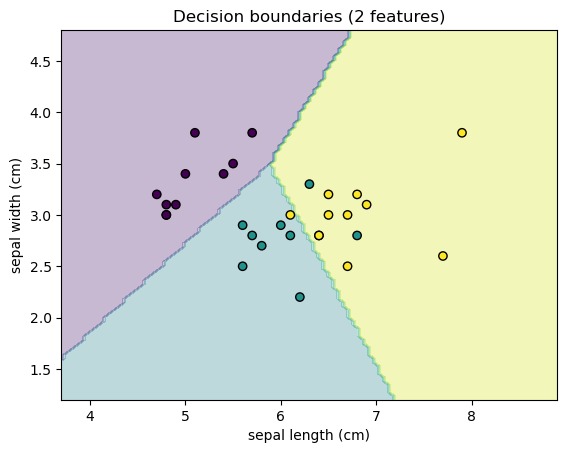

In [7]:
# Visualize decision boundaries using the first two features
import numpy as np
import matplotlib.pyplot as plt

# Restrict to first two features
X_train_2 = X_train[:, :2]
X_test_2  = X_test[:,  :2]

# Retrain on 2D data
model2 = LogisticRegression(max_iter=200).fit(X_train_2, y_train)

# Create a meshgrid over feature space
xx, yy = np.meshgrid(
    np.linspace(X_test_2[:, 0].min() - 1, X_test_2[:, 0].max() + 1, 100),
    np.linspace(X_test_2[:, 1].min() - 1, X_test_2[:, 1].max() + 1, 100)
)

# Predict on the grid and plot
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_2[:, 0], X_test_2[:, 1], c=y_test, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision boundaries (2 features)')
plt.show()
